In [15]:
import osmnx as os
import geopandas as gpd 
import folium 
import branca.colormap as cm

#https://alto.team/boda/
#https://drive.google.com/file/d/14Q64gvkqDmaGy2ToeOjIUyyyuYPy9bqN/view

In [17]:
gdf = gpd.read_file('budbalesetroads.geojson')
gdf.head(3)

DataSourceError: budbalesetroads.geojson: No such file or directory

In [ ]:
len(gdf)

In [18]:
import os
os.getcwd()


'/Users/social_todler'

['Music',
 'Traffic Accidents.ipynb',
 '.DS_Store',
 'cache',
 '.CFUserTextEncoding',
 '.arduinoIDE',
 'Pictures',
 '.zsh_history',
 '.ipython',
 'Desktop',
 'Library',
 '.matplotlib',
 '.grass7',
 'Public',
 'Movies',
 'Applications',
 'Points.ipynb',
 'budapest_pubs.html',
 '.Trash',
 '.ipynb_checkpoints',
 '.jupyter',
 'Documents',
 '.vscode',
 'Downloads',
 '.zsh_sessions']

In [20]:
os.listdir()


['Music',
 'Traffic Accidents.ipynb',
 '.DS_Store',
 'cache',
 '.CFUserTextEncoding',
 '.arduinoIDE',
 'Pictures',
 '.zsh_history',
 '.ipython',
 'Desktop',
 'Library',
 '.matplotlib',
 '.grass7',
 'Public',
 'Movies',
 'Applications',
 'Points.ipynb',
 'budapest_pubs.html',
 '.Trash',
 '.ipynb_checkpoints',
 '.jupyter',
 'Documents',
 '.vscode',
 'Downloads',
 '.zsh_sessions']

In [21]:
import geopandas as gpd

gdf = gpd.read_file(
    "/Users/social_todler/Desktop/budbalesetroads.geojson"
)

gdf.head(3)


/Users/social_todler/Library/Python/3.9/lib/python/site-packages/pyogrio/raw.py:198: RuntimeWarning: Several features with id = 90598 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


,fid,osm_id,code,fclass,layer,id,_Medianmean,geometry
0,1,4059955,5114,secondary,0,58303,1.259259,"LINESTRING (19.04973 47.48765, 19.04983 47.487..."
1,2,4059964,5115,tertiary,0,59919,47.910000,"LINESTRING (19.05567 47.52694, 19.05518 47.526..."
2,3,4059966,5124,pedestrian,0,59980,1.566667,"LINESTRING (19.05797 47.48741, 19.05755 47.487..."


In [22]:
len(gdf)


86709

<Axes: >

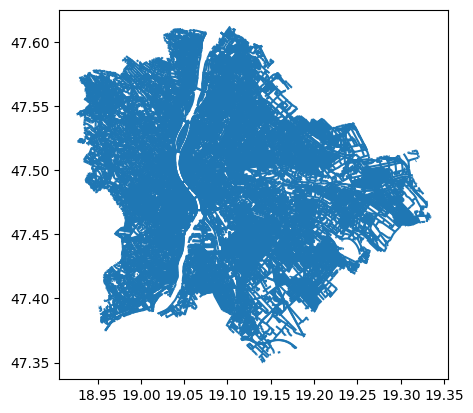

In [23]:
gdf.plot()

In [30]:
colormap = LinearColormap(
    colors=list(reversed(cm.linear.RdYlGn_11.colors)),
    vmin=gdf["_Medianmean"].min(),
    vmax=gdf["_Medianmean"].max()
).to_step(10)

colormap


In [31]:
minx, miny, maxx, maxy = gdf.total_bounds
center = [(miny + maxy) / 2, (minx + maxx)/2]

In [ ]:
m = folium.Map(location = center, zoom_start = 12, tiles = "CartoDB positron")

folium.GeoJson(
    gdf,
    style_function = lambda feature:{
        "Color":colormap(feature["properties"]["_Medianmean"]),
        "Weight": 3,
        "opacity": 0.9
    }

    
).add_to(m)

colormap.caption = "Traffic accidents (2015-18)"
colormap.add_to(m)

m.fit_bounds([[miny, minx], [maxy, maxx]])

m.save("budapest_accidents.html")
m